# Tensorflow for house prices
tensorflow tutorial  
reference: https://www.tensorflow.org/tutorials/keras/basic_regression?hl=ja

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
# datasets
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
train_data
train_labels

array([32. , 27.5, 32. , 23.1, 50. , 20.6, 22.6, 36.2, 21.8, 19.5, 15. ,
       15.6, 50. , 30.1, 12.5, 22.2, 26.5, 50. ,  8.3, 16.5, 17.8, 15.7,
       19.3, 26.6, 29. , 15.6, 18.7, 24.1, 13.3,  8.5, 19.5, 13.1, 11.7,
       25. , 24.8, 20.6, 12.1, 19.6, 25. , 22.7, 14.6, 17.1, 50. , 22.6,
       13.1, 20.6, 18.4, 24.8, 25. , 18.1, 16.8, 16.1, 24.4, 18.5, 21. ,
       19.1, 16.1, 18.2, 15.3, 20.4, 17.8, 23. ,  7.2, 16.7, 33.4, 13.8,
       43.8, 28.6, 18.3, 18.7, 17.3, 19.4, 11.9, 20.6, 23.7, 50. , 22.6,
       25.3, 24.8, 18.7, 21.7, 20.6, 23.2, 26.4, 33.2, 15.2, 41.3, 23.9,
       31. , 13.4, 23.9, 14.9, 22.8, 28. , 20.4, 12.8, 20.6, 21.4, 14.8,
       15.6, 30.1, 11. , 25. , 11.7, 16.3, 33.4, 22.9, 29.1, 21. , 31.1,
       19.3, 23.4, 28.7, 16. , 23.2, 17.2, 26.6, 17.8, 22.3, 20.8, 25.2,
       28.5, 23.3, 20.1, 19.3, 19.4, 12.7, 37.3, 13.9, 19.6, 12.7, 15.6,
       32.2, 12.6,  7.5, 23.7, 22.8, 22.2, 44.8, 36.5, 31.6, 22.9, 14.4,
       14.3,  5. , 19.1, 22.5, 10.9, 23. , 21.4,  8

In [10]:
print(train_data.shape)
print(test_data.shape)
train_data[0]

(404, 13)
(102, 13)


array([7.8750e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01,
       6.7820e+00, 4.1100e+01, 3.7886e+00, 5.0000e+00, 3.9800e+02,
       1.5200e+01, 3.9387e+02, 6.6800e+00])

In [13]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [18]:
# normalize data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [23]:
# define model
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

In [41]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [42]:
# train data
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        else:
            print(".", end='')
            
EPOCHS = 500
# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])


.................................................................................

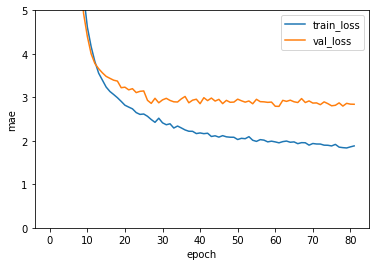

In [43]:
def plot_history(history):
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('mae')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label='train_loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label='val_loss')
    plt.legend()
    plt.ylim([0, 5])
    
plot_history(history)

In [45]:
# test data
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print(loss, mae)

23.624076693665746 3.317365749209535


In [48]:
# prediction
predictions = model.predict(test_data).flatten()
predictions

array([ 9.36554 , 17.88502 , 20.846924, 31.175493, 25.085981, 19.08364 ,
       22.454542, 21.057867, 18.810171, 22.742666, 16.100462, 16.679422,
       15.564481, 39.451454, 18.419058, 18.884993, 26.490465, 17.792242,
       19.534292, 28.596285, 11.555925, 15.693106, 20.985888, 15.403813,
       19.688334, 25.857855, 30.25419 , 27.079317, 11.060478, 19.6456  ,
       18.755468, 14.661319, 32.546177, 24.704336, 17.74011 ,  8.597883,
       16.273336, 17.589394, 21.681162, 23.801363, 27.911787, 27.114027,
       14.004719, 38.64486 , 30.762691, 25.022429, 26.50114 , 15.987947,
       22.332008, 21.554514, 31.20209 , 18.273932, 11.844957, 16.658712,
       32.30697 , 26.919283, 12.096565, 45.903397, 33.979393, 22.180357,
       25.111567, 16.039404, 14.182985, 17.700396, 22.9876  , 20.408936,
       13.19899 , 21.047361, 13.574501,  7.971544, 28.6334  , 26.523493,
       26.486168, 14.932066, 23.99011 , 16.625952, 18.78051 , 22.59569 ,
       33.195484, 10.790781, 19.989317, 36.420074, 